<a href="https://colab.research.google.com/github/RoshanM-18/Intermediate-Deep-Learning-projects-using-Tensorflow-Keras/blob/main/Text_generation_with_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow-text

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pathlib
# import tensorflow_text as tf_text

In [ ]:
import tensorflow_datasets as tfd
import zipfile

In [ ]:
import requests
import os
import sys
import string
import random
import math

### Downloading the dataset, exploring the dataset and cleaning the dataset

In [ ]:
response = requests.get("https://nlp.stanford.edu/courses/lsa352/shaks12.txt")
data = response.text.split("\n")

In [ ]:
data

['This is the 100th Etext file presented by Project Gutenberg, and\r',
 'is presented in cooperation with World Library, Inc., from their\r',
 'Library of the Future and Shakespeare CDROMS.  Project Gutenberg\r',
 'often releases Etexts that are NOT placed in the Public Domain!!\r',
 '\r',
 'Shakespeare\r',
 '\r',
 '*This Etext has certain copyright implications you should read!*\r',
 '\r',
 '<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM\r',
 'SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS\r',
 'PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE\r',
 'WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE\r',
 'DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS\r',
 'PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED\r',
 'COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY\r',
 'SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>\r',
 '\r',
 '*Project Gutenberg is proud to cooperate with The

In [ ]:
data = "".join(data[253:]).split("\r")

In [ ]:
data[0]

'  From fairest creatures we desire increase,'

In [ ]:
len(data)

124204

In [ ]:
data = " ".join(data)

In [ ]:
def clean_text(text):

  tokens = text.split()
  table = str.maketrans("", "", string.punctuation)
  tokens = [x.translate(table) for x in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [x.lower() for x in tokens]
  return tokens

In [ ]:
cleaned_data = clean_text(data)

In [ ]:
cleaned_data

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the',
 'grave',
 'and',

In [ ]:
vocab = len(list(set(cleaned_data)))

In [ ]:
vocab

27956

In [ ]:
length = 50+1
lines = []
count = 0

for x in range(length, len(cleaned_data)):
  sequence = cleaned_data[x-length:x]
  line = " ".join(sequence)
  lines.append(line)
  count +=1

  if count>100000:
    break

In [ ]:
lines[0]

'from fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self'

In [ ]:
lines[1]

'fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self thy'

In [ ]:
len(lines)

100001

### Building the model and preparing the dataset to feed it to the model

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [ ]:
sequences[:10]

[[49,
  1437,
  1624,
  44,
  427,
  1305,
  9,
  2338,
  669,
  850,
  166,
  131,
  229,
  17,
  27,
  1,
  2978,
  86,
  31,
  83,
  2977,
  19,
  771,
  1436,
  166,
  205,
  19,
  975,
  17,
  22,
  2976,
  4,
  160,
  119,
  741,
  133,
  8845,
  26,
  8843,
  1919,
  16,
  8842,
  8841,
  596,
  7,
  2974,
  107,
  1918,
  458,
  26,
  176],
 [1437,
  1624,
  44,
  427,
  1305,
  9,
  2338,
  669,
  850,
  166,
  131,
  229,
  17,
  27,
  1,
  2978,
  86,
  31,
  83,
  2977,
  19,
  771,
  1436,
  166,
  205,
  19,
  975,
  17,
  22,
  2976,
  4,
  160,
  119,
  741,
  133,
  8845,
  26,
  8843,
  1919,
  16,
  8842,
  8841,
  596,
  7,
  2974,
  107,
  1918,
  458,
  26,
  176,
  26],
 [1624,
  44,
  427,
  1305,
  9,
  2338,
  669,
  850,
  166,
  131,
  229,
  17,
  27,
  1,
  2978,
  86,
  31,
  83,
  2977,
  19,
  771,
  1436,
  166,
  205,
  19,
  975,
  17,
  22,
  2976,
  4,
  160,
  119,
  741,
  133,
  8845,
  26,
  8843,
  1919,
  16,
  8842,
  8841,
  596,
  7,
  297

In [ ]:
X_train, y_train = np.array(sequences)[:, :-1], np.array(sequences)[:, -1]

In [ ]:
X_train[:5], y_train[:5]

(array([[  49, 1437, 1624,   44,  427, 1305,    9, 2338,  669,  850,  166,
          131,  229,   17,   27,    1, 2978,   86,   31,   83, 2977,   19,
          771, 1436,  166,  205,   19,  975,   17,   22, 2976,    4,  160,
          119,  741,  133, 8845,   26, 8843, 1919,   16, 8842, 8841,  596,
            7, 2974,  107, 1918,  458,   26],
        [1437, 1624,   44,  427, 1305,    9, 2338,  669,  850,  166,  131,
          229,   17,   27,    1, 2978,   86,   31,   83, 2977,   19,  771,
         1436,  166,  205,   19,  975,   17,   22, 2976,    4,  160,  119,
          741,  133, 8845,   26, 8843, 1919,   16, 8842, 8841,  596,    7,
         2974,  107, 1918,  458,   26,  176],
        [1624,   44,  427, 1305,    9, 2338,  669,  850,  166,  131,  229,
           17,   27,    1, 2978,   86,   31,   83, 2977,   19,  771, 1436,
          166,  205,   19,  975,   17,   22, 2976,    4,  160,  119,  741,
          133, 8845,   26, 8843, 1919,   16, 8842, 8841,  596,    7, 2974,
        

In [ ]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'of': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'that': 9,
 'in': 10,
 'is': 11,
 'not': 12,
 'me': 13,
 'for': 14,
 'it': 15,
 'with': 16,
 'but': 17,
 'be': 18,
 'his': 19,
 'he': 20,
 'your': 21,
 'thou': 22,
 'have': 23,
 'this': 24,
 'so': 25,
 'thy': 26,
 'as': 27,
 'him': 28,
 'will': 29,
 'her': 30,
 'by': 31,
 'what': 32,
 'no': 33,
 'thee': 34,
 'do': 35,
 'all': 36,
 'if': 37,
 'are': 38,
 'love': 39,
 'shall': 40,
 'antony': 41,
 'which': 42,
 'or': 43,
 'we': 44,
 'good': 45,
 'when': 46,
 'on': 47,
 'our': 48,
 'from': 49,
 'well': 50,
 'more': 51,
 'sir': 52,
 'lord': 53,
 'was': 54,
 'she': 55,
 'o': 56,
 'at': 57,
 'would': 58,
 'am': 59,
 'rosalind': 60,
 'cleopatra': 61,
 'now': 62,
 'they': 63,
 'then': 64,
 'caesar': 65,
 'come': 66,
 'than': 67,
 'enter': 68,
 'how': 69,
 'ill': 70,
 'their': 71,
 'make': 72,
 'know': 73,
 'let': 74,
 'yet': 75,
 'hath': 76,
 'upon': 77,
 'mine': 78,
 'one': 79,
 'say': 80,
 'did': 81,
 'like': 82

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=vocab)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape, y_train.shape

((100001, 50), (100001, 27956))

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab, X_train.shape[1], input_length=X_train.shape[1]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128, return_sequences=False),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(vocab, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            1397800   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 128)           91648     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 27956)             1

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.2), metrics=["accuracy"],
          optimizer=keras.optimizers.Adam())

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=70)

Epoch 1/70
1563/1563 [==============================] - 35s 19ms/step - loss: 7.8520 - accuracy: 0.0283
Epoch 2/70
1563/1563 [==============================] - 30s 19ms/step - loss: 7.6123 - accuracy: 0.0375
Epoch 3/70
1563/1563 [==============================] - 30s 19ms/step - loss: 7.4838 - accuracy: 0.0491
Epoch 4/70
1563/1563 [==============================] - 30s 19ms/step - loss: 7.3753 - accuracy: 0.0621
Epoch 5/70
1563/1563 [==============================] - 30s 19ms/step - loss: 7.2566 - accuracy: 0.0741
Epoch 6/70
1563/1563 [==============================] - 30s 19ms/step - loss: 7.1430 - accuracy: 0.0857
Epoch 7/70
1563/1563 [==============================] - 30s 19ms/step - loss: 7.0414 - accuracy: 0.0971
Epoch 8/70
1563/1563 [==============================] - 30s 19ms/step - loss: 6.9524 - accuracy: 0.1054
Epoch 9/70
1563/1563 [==============================] - 30s 19ms/step - loss: 6.8771 - accuracy: 0.1114
Epoch 10/70
1563/1563 [==============================] - 30s 19m

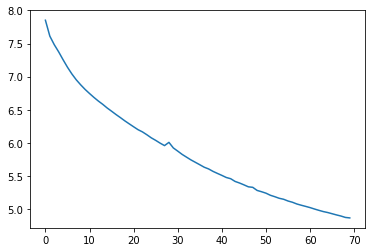

In [ ]:
pd.DataFrame(history.history)["loss"].plot()

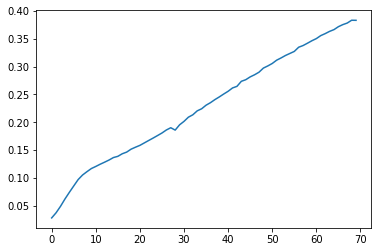

In [ ]:
pd.DataFrame(history.history)["accuracy"].plot()

#### Inference 

In [ ]:
def generate_text_sequence(model, tokenizer, text_sequence_length, seed_text, n_words):

  text = []
  seed = []

  for x in range(n_words):
    # encoding the sentence into vector representation
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    # padding the encoded sequence to the required text sequence length 
    encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded], maxlen=text_sequence_length, truncating="pre")

    pred = model.predict(encoded)
    pred = np.argmax(pred, axis=1)

    predicted_word = ""
    for word, index in tokenizer.word_index.items():
      if index==pred:
        predicted_word = word
        break

    seed_text = seed_text + " " + predicted_word
    seed.append(seed_text)
    text.append(predicted_word)

  return " ".join(text), seed

In [ ]:
generate_text_sequence(model, tokenizer, 50, lines[1], 5)

('foe to thy sweet self',
 ['fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self thy foe',
  'fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self thy foe to',
  'fairest creatures we desire increase that thereby beautys rose might never die but as the riper should by time decease his tender heir might bear his memory but thou contracted to thine own bright eyes feedst thy lights flame with selfsubstantial fuel making a famine where abundance lies thy self thy foe to thy',
  'fairest creatures we desire 